# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

data.head(10)


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

It helps us to understand and work with the data.
Get a quick undertanding of the data.
To identify issues with the data.
To understand the relationship between the dependent and independent variables.

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

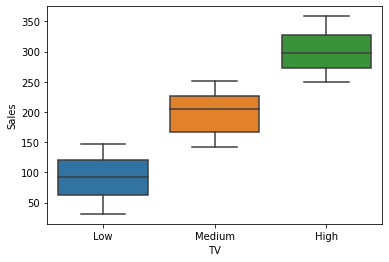

In [3]:
sns.boxplot(x = data["TV"],y = data["Sales"])

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `seaborn` library that creates a boxplot showing the distribution of a variable across multiple groups.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `boxplot()` function from `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `TV` as the `x` argument, `Sales` as the `y` argument, and `data` as the `data` argument.

</details>

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

Yes.
We can clearly see the variations in the Sales figures on the basis of TV.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

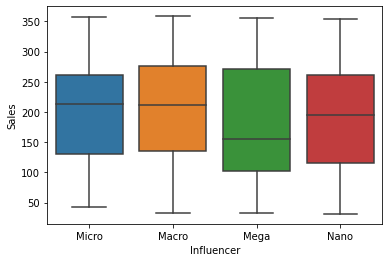

In [4]:
sns.boxplot(data["Influencer"],data["Sales"])

**Question:** Is there variation in `Sales` based off the `Influencer` size?

It looks as if there is no variation as they all seem to have the same range of values.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [7]:
data.isna().any(axis = 0).sum()
# so this means that we have three rows that have null values

3

In [10]:
# Drop rows that contain missing data and update the DataFrame.
data = data.dropna().reset_index()

# Confirm the data contains no missing values.
data.isna().sum()



level_0         0
index           0
TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [20]:
# Define the OLS formula.
ols_formula = "Sales ~ C(TV)"
ols_data = data[["Sales","TV"]]

# Create an OLS model.
OLS = ols(ols_formula,ols_data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
results = model.summary()

# Display the model results.
results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          8.81e-256
Time:                        11:45:13   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to code you've written to fit linear regression models.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function from `statsmodels.formula.api`, which creates a model from a formula and DataFrame, to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `C()` around the variable name in the ols formula to indicate a variable is categorical.
    
Be sure the variable string names exactly match the column names in `data`.

</details>

**Question:** Which categorical variable did you choose for the model? Why?

TV as it was the first i found.
Lmao.

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

Since we have categorical data, we assume that the linearity assumption is met.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

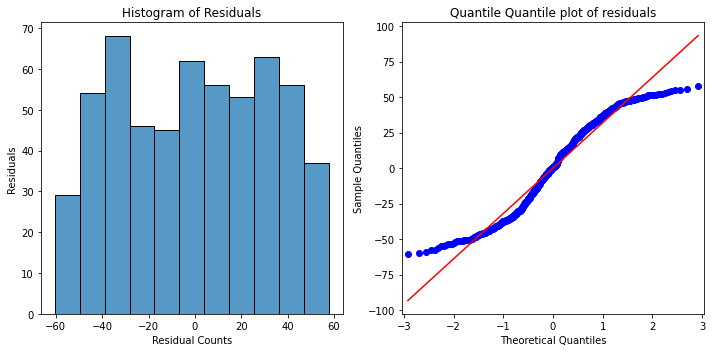

In [42]:
# Calculate the residuals.

residuals = model.resid
fig,axes = plt.subplots(1,2,figsize = (10,5))

# Create a histogram with the residuals. 
sns.histplot(residuals,ax = axes[0])
axes[0].set_xlabel("Residual Counts")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.
sm.qqplot(residuals,line = 's',ax = axes[1])
axes[1].set_title("Quantile Quantile plot of residuals")

plt.tight_layout()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?

The qqplot shows a linear line for the most part and the histogram also shows a normal distribution so we can say that the normality condition is met.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

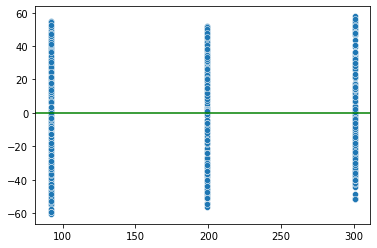

In [43]:
# Create a scatter plot with the fitted values from the model and the residuals.
sns.scatterplot(model.fittedvalues,model.resid)

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
plt.axhline(0,color = 'g')



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

Yes since the variance seems to be over the same range of values, roughly.

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [44]:
# Display the model results summary.
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          8.81e-256
Time:                        11:45:13   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

The TV variable is able to explain 87.4 % of the variability of the dependent variable Sales. This means that although this does not explain everything, its still a good start.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

So we observe that the "high" value is considered as the default
So if we switch from "high" to "medium" TV budget, we see a drop of 101.5061 Million dollars in the Sales figure.
So if we switch from "high" to "low" TV budget, we see a drop of 208.8133 Million dollars in the Sales figure.
This says that its suggested to keep the TV budget as high.

Moreover, for all the coefficients we have a p value of 0.00, so can say that the coefficients are statistically significant. 

**Question:** Do you think your model could be improved? Why or why not? How?

Absolutely could be improved, as we observe that only 87.4% of the variability was explained.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [45]:
# Create an one-way ANOVA table for the fit model.
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?

Null hypothesis - the mean values of sales is the same for different values of TV variable.

Alt hypothesis - the mean values of sales is not the same for different values of TV variable.(Even if one variable is different, the alt hypothesis is true)

**Question:** What is your conclusion from the one-way ANOVA test?

The f test statistic is 1971.455737 and the p value is 8.805550e-256, i.e. very small value.

**Question:** What did the ANOVA test tell you?

We see that the p value is < than the significance value of 0.05, so we reject the null hypothesis and say that there is a difference.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [46]:
# Perform the Tukey's HSD post hoc test.
tukey_hsd = pairwise_tukeyhsd(endog = ols_data["Sales"],groups = ols_data["TV"])

tukey_hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a Tukey's HSD post hoc test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pairwise_tukeyhsd()` function from `statsmodels.stats.multicomp`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `endog` argument in `pairwise_tukeyhsd` indicates which variable is being compared across groups (i.e., `Sales`). The `groups` argument in `pairwise_tukeyhsd` tells the function which variable holds the group you’re interested in reviewing.

</details>

**Question:** What is your interpretation of the Tukey HSD test?

The p values for all combinations of groups is 0.01. This means that for significance value of 0.05, we can reject the null hypothesis and say that there is a statistical difference between the means of every group.

**Question:** What did the post hoc tell you?**

The ANOVA test told us that there is difference in the mean Sales for the TV variables, but it does not tell us the pairwise difference.

To do so, we use a ANOVA post hoc test.
Here, we can see that the Sales mean values are not the same for any of the pairs and thus they are statistically significant.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

How to apply ANOVA
How to apply post hoc test
Box plots are helpful to get a general understanding of the variability of the data


**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

An initial regression analysis identified that there is a relationship between the TV and Sales variables. With a R-value of 86%, we can say that Sales explains a great deal of variability and forms a key aspect of Sales figures.

TV has three values and going from "High" to "Low" and "High" to "Medium" results in drop of sales by 107.31 million millionand 208.8133 million respectively.

Using ANOVA, we analysed the difference between the groups of the TV variable. We observed that there is statistical difference between the groups

Using a post hoc test, we identified that there is a statistical difference between every pair of groups, meaning that the mean Sales value is not same for any two groups of the TV variables.

#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.